In [24]:
from utils import get_meta
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import cv2
%matplotlib inline
from tqdm import tqdm
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split

from tflearn.data_utils import shuffle, to_categorical
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation



In [2]:
ls/data

wiki_crop/


In [2]:
db='wiki'
mat_path='/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/wiki.mat'
full_path, dob, gender, photo_taken, face_score, second_face_score, age= get_meta(mat_path, db)

temp_dataframe={"full_path":full_path,'gender':gender,'face_score':face_score,'second_face_score':second_face_score,'age':age}
df=pd.DataFrame(temp_dataframe)
print(df.head())
train_dir='/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/'

img_size=50
LR=1e-3
model_name='ageandgender-{}-{}.model'.format(LR,'2conv_basic')


   age  face_score                          full_path  gender  \
0   28    4.300962  [17/10000217_1981-05-05_2009.jpg]     1.0   
1   39    2.645639  [48/10000548_1925-04-04_1964.jpg]     1.0   
2   59    4.329329    [12/100012_1948-07-03_2008.jpg]     1.0   
3   31        -inf  [65/10001965_1930-05-23_1961.jpg]     1.0   
4   41    3.408442  [16/10002116_1971-05-31_2012.jpg]     0.0   

   second_face_score  
0                NaN  
1           1.949248  
2                NaN  
3                NaN  
4                NaN  


In [3]:
path=[]
type(df.full_path)
for i in df.full_path:
    i=str(i)[2:-2]
    path.append(os.path.join(train_dir,str(i)))
print(path[:10])    

['/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/17/10000217_1981-05-05_2009.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/48/10000548_1925-04-04_1964.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/12/100012_1948-07-03_2008.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/65/10001965_1930-05-23_1961.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/16/10002116_1971-05-31_2012.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/02/10002702_1960-11-09_2012.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/41/10003541_1937-09-27_1971.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/39/100039_1904-12-07_1982.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/data/wiki_crop/13/10004113_1946-08-26_2007.jpg', '/home/geekysethi/Desktop/age-and-gender/age-and-gender/da

In [4]:
df.full_path=path
df.head()

,age,face_score,full_path,gender,second_face_score
0,28,4.300962,/home/geekysethi/Desktop/age-and-gender/age-an...,1.0,NaN
1,39,2.645639,/home/geekysethi/Desktop/age-and-gender/age-an...,1.0,1.949248
2,59,4.329329,/home/geekysethi/Desktop/age-and-gender/age-an...,1.0,NaN
3,31,-inf,/home/geekysethi/Desktop/age-and-gender/age-an...,1.0,NaN
4,41,3.408442,/home/geekysethi/Desktop/age-and-gender/age-an...,0.0,NaN


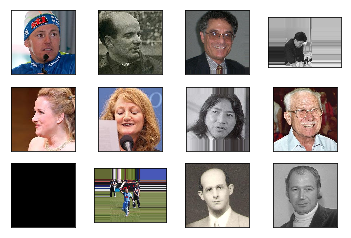

In [5]:
def show_images(path):
    fig=plt.figure()
    for num, img_no in enumerate(path[:12]):
        y=fig.add_subplot(3,4,num+1)
        img=cv2.imread(img_no,3)
        y.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)

    
show_images(path)  

In [6]:
print(df.head())
print(df.isnull().values.any())
print(df.gender.isnull().sum())
df.drop(df[df.gender.isnull()==True].index,inplace=True)
print(df.gender.isnull().sum())
print(df.head())
df[df.face_score<0]=np.nan
df.drop(df[df.face_score.isnull()==True].index,inplace=True)
print(df.head())


   age  face_score                                          full_path  gender  \
0   28    4.300962  /home/geekysethi/Desktop/age-and-gender/age-an...     1.0   
1   39    2.645639  /home/geekysethi/Desktop/age-and-gender/age-an...     1.0   
2   59    4.329329  /home/geekysethi/Desktop/age-and-gender/age-an...     1.0   
3   31        -inf  /home/geekysethi/Desktop/age-and-gender/age-an...     1.0   
4   41    3.408442  /home/geekysethi/Desktop/age-and-gender/age-an...     0.0   

   second_face_score  
0                NaN  
1           1.949248  
2                NaN  
3                NaN  
4                NaN  
True
2643
0
   age  face_score                                          full_path  gender  \
0   28    4.300962  /home/geekysethi/Desktop/age-and-gender/age-an...     1.0   
1   39    2.645639  /home/geekysethi/Desktop/age-and-gender/age-an...     1.0   
2   59    4.329329  /home/geekysethi/Desktop/age-and-gender/age-an...     1.0   
3   31        -inf  /home/geekysethi/De

In [7]:
img_paths=df.full_path.values
gender=df.gender.values

1.0    32650
0.0    10802
Name: gender, dtype: int64


<function matplotlib.pyplot.plot>

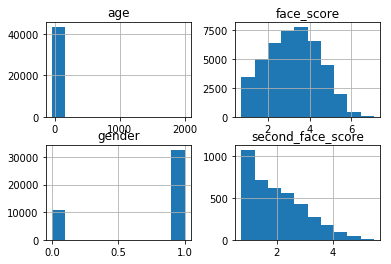

In [8]:
print(df.gender.value_counts())
df.hist()
plt.plot

In [49]:
data_0=(df.full_path[df.gender==0])[:10000]
data_1=shuffle(df.full_path[df.gender==1])
data_1=data_1[0][:10000]

In [ ]:
print(len(data_0))
print(len(data_1))

n_files=len(data_0)+len(data_1)
print(n_files)

allX = np.zeros((n_files, img_size, img_size, 3), dtype='float64')
ally = np.zeros(n_files)
count=0

for f in tqdm(data_0):
    img=cv2.imread(f,1)
    img=cv2.resize(img,(img_size,img_size))
    allX[count]=np.array(img)
    ally[count]=0
    count+=1
    
for f in data_1:
    img=cv2.imread(f,1)
    img=cv2.resize(img,(img_size,img_size))
    allX[count]=np.array(img)
    ally[count]=1
    count+=1



  1%|          | 104/10000 [00:00<00:09, 1037.47it/s]

10000
10000
20000


 75%|███████▍  | 7498/10000 [01:22<00:27, 90.76it/s] 

In [10]:
for i in img_paths[:10]:
    print(i)

/data/wiki_crop/17/10000217_1981-05-05_2009.jpg
/data/wiki_crop/48/10000548_1925-04-04_1964.jpg
/data/wiki_crop/12/100012_1948-07-03_2008.jpg
/data/wiki_crop/16/10002116_1971-05-31_2012.jpg
/data/wiki_crop/02/10002702_1960-11-09_2012.jpg
/data/wiki_crop/41/10003541_1937-09-27_1971.jpg
/data/wiki_crop/39/100039_1904-12-07_1982.jpg
/data/wiki_crop/99/10004299_1908-08-19_1950.jpg
/data/wiki_crop/56/1000456_1933-06-12_1969.jpg
/data/wiki_crop/82/10004882_1987-05-16_2010.jpg


In [11]:
img_paths
# gender

array(['/data/wiki_crop/17/10000217_1981-05-05_2009.jpg',
       '/data/wiki_crop/48/10000548_1925-04-04_1964.jpg',
       '/data/wiki_crop/12/100012_1948-07-03_2008.jpg', ...,
       '/data/wiki_crop/49/9996949_1937-04-17_1963.jpg',
       '/data/wiki_crop/09/9998109_1972-12-27_2013.jpg',
       '/data/wiki_crop/80/999980_1954-06-11_2008.jpg'], dtype=object)

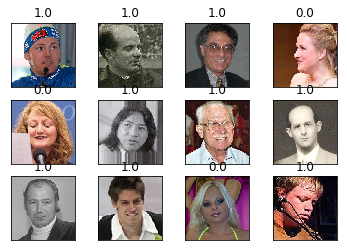

In [12]:
fig=plt.figure()
for num, img_no in enumerate(img_paths[:12]):
    y=fig.add_subplot(3,4,num+1)
    img=cv2.imread(img_no,1)
    plt.title(gender[num])
    y.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)


In [13]:
def train_images(n_files,img_size,img_path):
    total_images = np.zeros((n_files, img_size, img_size, 3))
    count=0
    for img_path in tqdm(img_paths):
        img=cv2.imread(img_path,1)
        img=cv2.resize(img,(img_size,img_size))
        total_images[count]=np.array(img.reshape(-1,img_size,img_size,3))
        count+=1
    np.save('training_data_age-and-gender.npy',total_images)
    return total_images


In [14]:
n_files=len(df)
total_images=train_images(n_files,img_size,img_paths)

100%|██████████| 43452/43452 [14:02<00:00, 51.56it/s]


In [15]:
# if os.path.isfile('training_data_age-and-gender.npy'):
#     total_images=np.load('training_data_age-and-gender.npy')

In [16]:

X, X_test, Y, Y_test = train_test_split(total_images, gender, test_size=0.2, random_state=42)
X, Y = shuffle(X, Y) 
Y = to_categorical(Y, 2)
Y_test = to_categorical(Y_test, 2)

In [17]:
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)


In [18]:
print(Y[:12])

[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]


In [26]:
print(np.shape(X))

(34761, 28, 28, 3)


In [31]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression


import tensorflow as tf
tf.reset_default_graph()

convnet=input_data(shape=[None,img_size,img_size,3],data_preprocessing=img_prep,data_augmentation=img_aug,name='input')

convnet=conv_2d(convnet,32,3,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,64,3,activation='relu')
# convnet=conv_2d(convnet,64,3,activation='relu')

convnet=max_pool_2d(convnet,2)
convnet=fully_connected(convnet,512,activation='relu')
convnet=dropout(convnet,0.5)

convnet=fully_connected(convnet,2,activation='softmax')

convnet=regression(convnet,optimizer='adam',learning_rate=LR,loss='categorical_crossentropy',name='targets')


model=tflearn.DNN(convnet,tensorboard_verbose=0)

# # if os.path.exists('{}.meta'.format(model_name)):
# #     model.load(model_name)
# #     print('model loaded!')

model.fit({'input':X},{'targets':Y},n_epoch=10,shuffle=True,validation_set=({'input':X_test},{'targets':Y_test}),
snapshot_step=500,show_metric=True,batch_size=96,run_id=model_name)

model.save(model_name)


---------------------------------
Run id: ageandgender-0.001-2conv_basicnew.model
Log directory: /tmp/tflearn_logs/


ValueError: Cannot use the given session to evaluate tensor: the tensor's graph is different from the session's graph.

In [28]:
network = input_data(shape=[None, 32, 32, 3],data_preprocessing=img_prep,data_augmentation=img_aug)

network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)

network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')


network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Train using classifier
model = tflearn.DNN(network)
model.fit(X, Y, n_epoch=50, shuffle=True, validation_set=(X_test, Y_test),show_metric=True,
          batch_size=96, run_id=model_name)
model.save(model_name)



IndexError: list index out of range